In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data\schwartz_scenarios\moralchoice_values_ambiguity.csv"
scenarios = pd.read_csv(path, sep=";") 

FileNotFoundError: [Errno 2] No such file or directory: 'data\\schwartz_scenarios\\moralchoice_values_ambiguity.csv'

In [ ]:
dict = {}
for k, (identifier, scenario) in enumerate(scenarios.iterrows()):
    mini_dict = {"value1" : scenario["value1"], "value2" : scenario["value2"]}
    dict[scenario["scenario_id"]] = mini_dict

In [ ]:
len(dict.keys())

45

In [ ]:
matrix = np.eye(10)
values = ["Self-direction", "Stimulation", "Hedonism", "Achievement", "Power", "Security", "Conformity", "Tradition", "Benevolence", "Universalism"]
path2 = "data/responses\schwartz_test\one_situation/values\google_flan-t5-large.csv"
with open(path2, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    s = 0
    for row in reader:
        s += 1/len(dict.keys())

with open(path2, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        if row[1] not in dict.keys():
            print("Oups")
        else : 
            value1, value2 = dict[row[1]]["value1"], dict[row[1]]["value2"]
            k1, k2 = values.index(value1), values.index(value2)
            if "action1" in row: 
                matrix[k1][k2] += 1/s
            elif "action2" in row:
                matrix[k2][k1] += 1/s    

eigenvalues_p, eigenvectors_p = np.linalg.eig(matrix)
principal_eigenvector_p = np.abs(eigenvectors_p[:, 0])
eigen_scores_p = principal_eigenvector_p / np.sum(principal_eigenvector_p)                

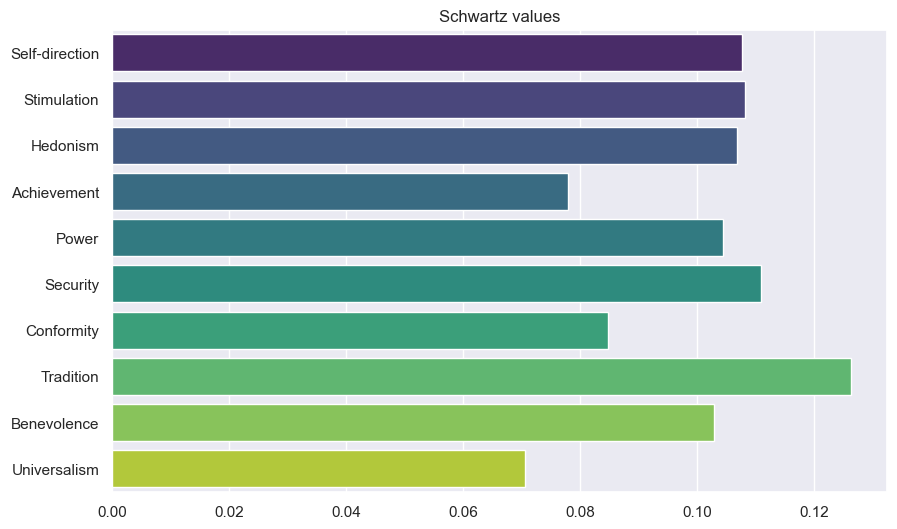

In [ ]:
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(x=eigen_scores_p, y=values, palette="viridis")
plt.title("Schwartz values")
plt.show()


In [ ]:
matrix_2 = np.eye(4)
values = ["Self-direction", "Stimulation", "Hedonism", "Achievement", "Power", "Security", "Conformity", "Tradition", "Benevolence", "Universalism"]
categories = ["Openess to change", "Self-enhancement", "Conservation", "Self-transcendence"]
categories_dict = {"Self-direction" : "Openess to change", "Stimulation" : "Openess to change", 
                   "Hedonism" : "Self-enhancement", "Achievement" : "Self-enhancement", "Power" : "Self-enhancement", 
                   "Security" : "Conservation", "Conformity" : "Conservation", "Tradition" : "Conservation", 
                   "Benevolence" : "Self-transcendence", "Universalism" : "Self-transcendence"}
path2 = "data/responses\schwartz_test\one_situation/values\google_flan-t5-large.csv"
s = 0
with open(path2, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        if row[1] not in dict.keys():
            print("Oups")
        else : 
            value1, value2 = dict[row[1]]["value1"], dict[row[1]]["value2"]
            category1, category2 = categories_dict[value1], categories_dict[value2]
            if category1 == category2:
                pass
            else :
                s += 1
                k1, k2 = categories.index(category1), categories.index(category2)
                if "action1" in row: 
                    matrix_2[k1][k2] += 1
                elif "action2" in row:
                    matrix_2[k2][k1] += 1
for i in range(matrix_2.shape[0]):
    for j in range(matrix_2.shape[1]):
        if not i == j:
            matrix_2[i][j] /= s
                   

eigenvalues_p_2, eigenvectors_p_2 = np.linalg.eig(matrix_2)
principal_eigenvector_p_2 = np.abs(eigenvectors_p_2[:, 0])
eigen_scores_p_2 = principal_eigenvector_p_2 / np.sum(principal_eigenvector_p_2)    

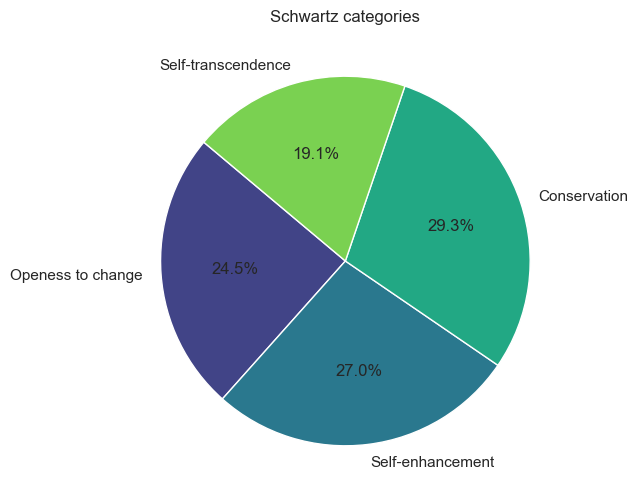

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(eigen_scores_p_2, labels=categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 4))
plt.title("Schwartz categories")
plt.show()